# Advanced Classification Predict
© Explore Data Science Academy

---
*   Theodore Maja
*   Thandiwe Khalaki
*   Tshepo Mokgata
*   Thomas Kenyon
*   Kamogelo Molekwa
---

### Honour Code

We, Team 1, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

---

### Predict Overview: 2021/22 Climate Change Belief Analysis

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

![alt text](https://miro.medium.com/max/1050/1*vp1M37AGMOFwCvLxVm62IA.jpeg)
<span>Photo by <a href="https://medium.com/@bensonruan">Benson Ruan</a> 

### Problem statement
Build a robust Machine Learning Model that will be able to predict a person’s belief in Climate Change based on their Tweet Data, allowing companies to gain access into customer sentiment.

---
The business problem we are pitching to solve involves a fictional line of clothing sourced from sustainable and/or recycled sources that Woolworths is considering investing in. This will likely require a significant amount of capital expenditure and risk, with the need for novel material sourcing and production techniques likely increasing costs further. We are offering a machine learning platform that can determine customer sentiment about climate change based on tweets, large numbers of users and/or customers who express their belief that climate change is real and caused by humans may be significantly more likely to pay attention to (and consider purchasing) this new line of clothing if it were launched.

  ### Sentiment Discription
  
        Class   Sentiments    Description
         2	   News:         the tweet link to factual news about climate change
         1       Pro:          the tweet supports the belief of man-made climate change
         0	   Neutral:      the tweet neither supports nor refutes the belief of man-made climate change
        -1       Anti:         the tweet does not believe in man-made climate change

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Appendix</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---

In [25]:
# !pip install fastText
# !pip install langdetect
# !pip install contractions
# !pip install scikit-plot

In [86]:
#!pip install wordcloud

In [1]:
import comet_ml
from comet_ml import Experiment

In [22]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

# imports for Natural Language  Processing
import re
import os
import nltk
import time
import numpy as np
import pandas as pd
#import xgboost
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

# Classification Models

from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB

# Performance Evaluation
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
#from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

#Resampling techniques -- not used here, but did try them.
from collections import Counter 
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

#spacy
#spacy.cli.download('en_core_web_sm')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

df_train: Dataframe that contains all the observations (tweets) used to train and test the model

df_test : Dataframe that contains all the observations (tweets) used to make Kaggle predictions

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

### Initial Observations

Peak inside the training dataframe, both dataframes have the same number of columns and column types

In [4]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


 **Variables definitions**

- sentiment: Sentiment of tweet
- message: Tweet body
- tweetid: Twitter unique id

Information about the dataframe. Both the sentiment and tweetid columns contain integer data, while the column with the feature we need to use to make predictions contains text data. This data is unstructured and not directly interpretable by the machine learning models we will be using, so it will have to undergo a considerable amount to pre-processing to convert into an appropriate form

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Get the size of the dataframe. Three columns and 15819 rows, with each row corresponding to a single tweet/observation

In [6]:
df_train.shape

(15819, 3)

Get information about the null columns/rows in the dataframe. There are not any which means we do not need to consider any methods to deal with missing data. If there was missing data, particularly in the 'message' column, it is likely that the only solution would be to delete the offending observations since this is text data and traditional methods of data imputation would not work here.

In [7]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

**Data Description**


* Has no null/missing values
* The train and test datasets contains one categorical column called 'message'
* The train dataset contains three columns
* Some tweets contain twitter handles,numbers,hashtags and re-tweets.
* New lines are represented by '\n' in the tweet string.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
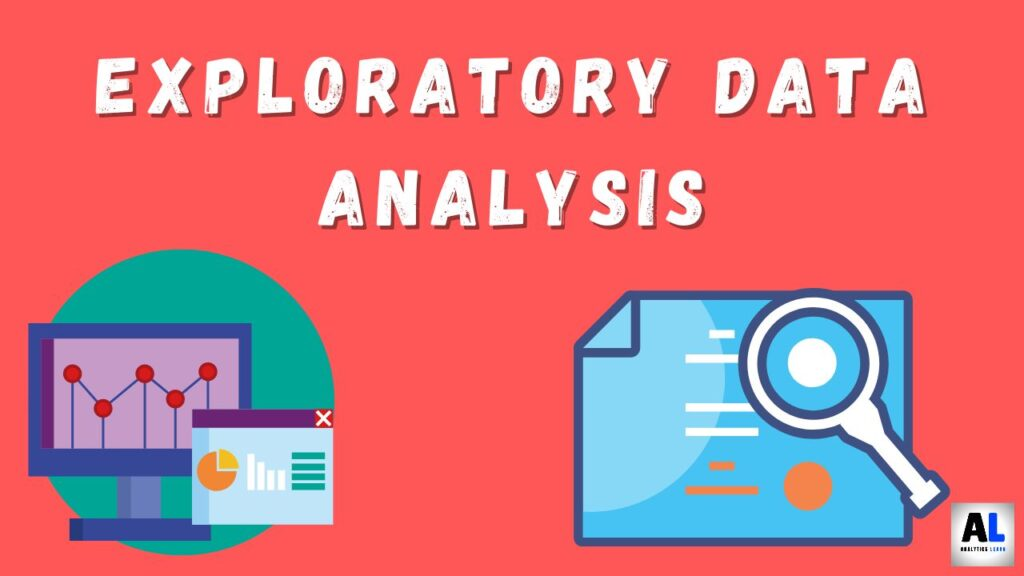

Create a dataframe copy

In [8]:
df = df_train.copy()

Let us look at the distribution of tweets by their sentiment. This is clearly an imbalanced dataset. There are are over 6 times more tweets with a labeled 'pro'. as there are tweets labeled 'anti'. The second most common sentiment in the dataset is the 'News' category, with less than half the number of tweets as the 'pro' sentiment. 

This has implications during model training, it is likely that the model will be significantly worse at correctly predicting the rarer sentiments.

In [9]:
sent_counts = df["sentiment"].value_counts()
sent_counts.name = "Count"
percs = df["sentiment"].value_counts(normalize=True) #turns out this normalize parameter converts to %
percs.name = "Percentage"

pd.concat([sent_counts, percs], axis=1)

,Count,Percentage
1,8530,0.539225
2,3640,0.230103
0,2353,0.148745
-1,1296,0.081927


Text(0.5, 1.0, 'Tweet sentiment distribution')

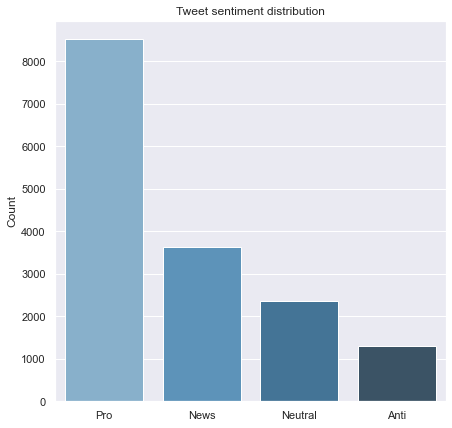

In [10]:
sentiment_distribution = pd.DataFrame(list(df['sentiment'].value_counts()),
                          index=['Pro', 'News', 'Neutral', 'Anti'],
                          columns=['Count'])
sns.set()
plt.figure(figsize=(7, 7))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.Count, 
           palette="Blues_d")
plt.title('Tweet sentiment distribution')

Let us look at the number of words in tweets

Create a new dataframe

In [11]:
tweet_df = df[['message','sentiment']]

To prep for EDA, we should do some preliminary text cleaning. Remove stopwords, punctuation etc. This isnt quite the same as what we will do for actual data pre-processing prior to model training

In [12]:
def remove_stop_words(tweet):
    words = tweet.split()
    l =  [t for t in words if t not in stopwords.words('english')]
    return ' '.join(l)

In [13]:
tweet_df['message'] = tweet_df['message'].str.lower()

In [14]:
puncs = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"
def remove_punctuation(post):
    return ''.join([l for l in post if l not in puncs])

In [15]:
%%time
tweet_df['message'] = tweet_df['message'].apply(remove_punctuation)

Wall time: 188 ms


This cell takes about a minute to run..

In [16]:
%%time
tweet_df['message'] = tweet_df['message'].apply(remove_stop_words)

Wall time: 1min 7s


In [17]:
tweet_df.head()

,message,sentiment
0,polyscimajor epa chief doesnt think carbon dio...,1
1,like lack evidence anthropogenic global warming,1
2,rt rawstory researchers say three years act cl...,2
3,todayinmaker wired 2016 pivotal year war clima...,1
4,rt soynoviodetodas 2016 racist sexist climate ...,1


Create classes of sentiments

In [18]:
news_tweets = ' '.join([text for text in tweet_df['message']
                        [tweet_df['sentiment'] == 2]])
pro_tweets = ' '.join([text for text in tweet_df['message']
                       [tweet_df['sentiment'] == 1]])
neutral_tweets = ' '.join([text for text in tweet_df['message']
                           [tweet_df['sentiment'] == 0]])
anti_tweets = ' '.join([text for text in tweet_df['message']
                        [tweet_df['sentiment'] == -1]])

### Visualise classes of sentiments

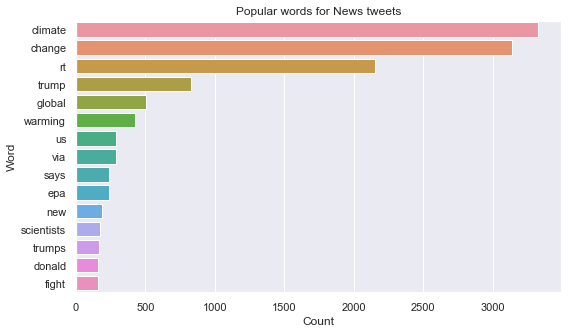

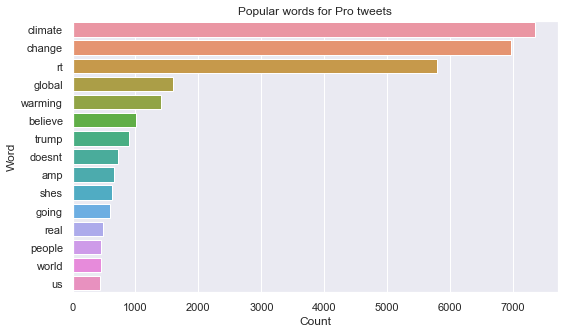

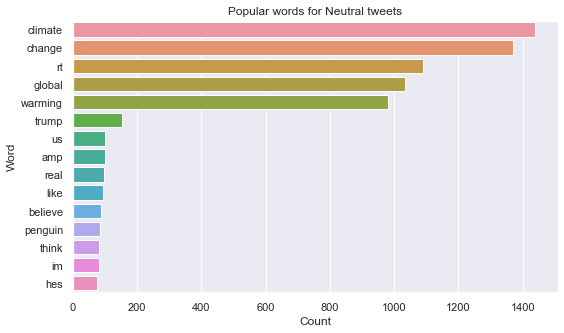

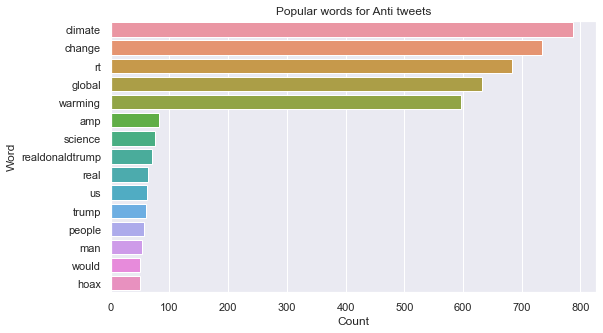

In [19]:
full_title = ['Popular words for News tweets',
              'Popular words for Pro tweets',
              'Popular words for Neutral tweets',
              'Popular words for Anti tweets']

tweet_list = [news_tweets, pro_tweets,
              neutral_tweets, anti_tweets]

plt.rcParams['figure.figsize'] = [40, 5]

for i, sent in enumerate(tweet_list):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent.split(' '))
    df = pd.DataFrame({'Word': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Word', x='Count')
    plt.title(full_title[i])
    plt.show()

Naturally, the most common words for all sentiments of tweets include 'climate change' an 'global warming'. The twitter keyword 'rt' or rather 'RT' as it was origially, indicates that a tweet is retweeted. It makes sense that there are a lot of retweets in each class. The United States ('us'), 'Trump' and 'epa' are common across most sentiments because these are tweets made mostly by American accounts, and this dataset was collected shortly after Donald Trump was elected as US president. Words like 'via', 'scientists', 'new' and 'says' are all common in News-labeled tweets because these often contain the titles of articles related to Climate Change and these words are all very commonly used in headlines.

### Create wordclouds

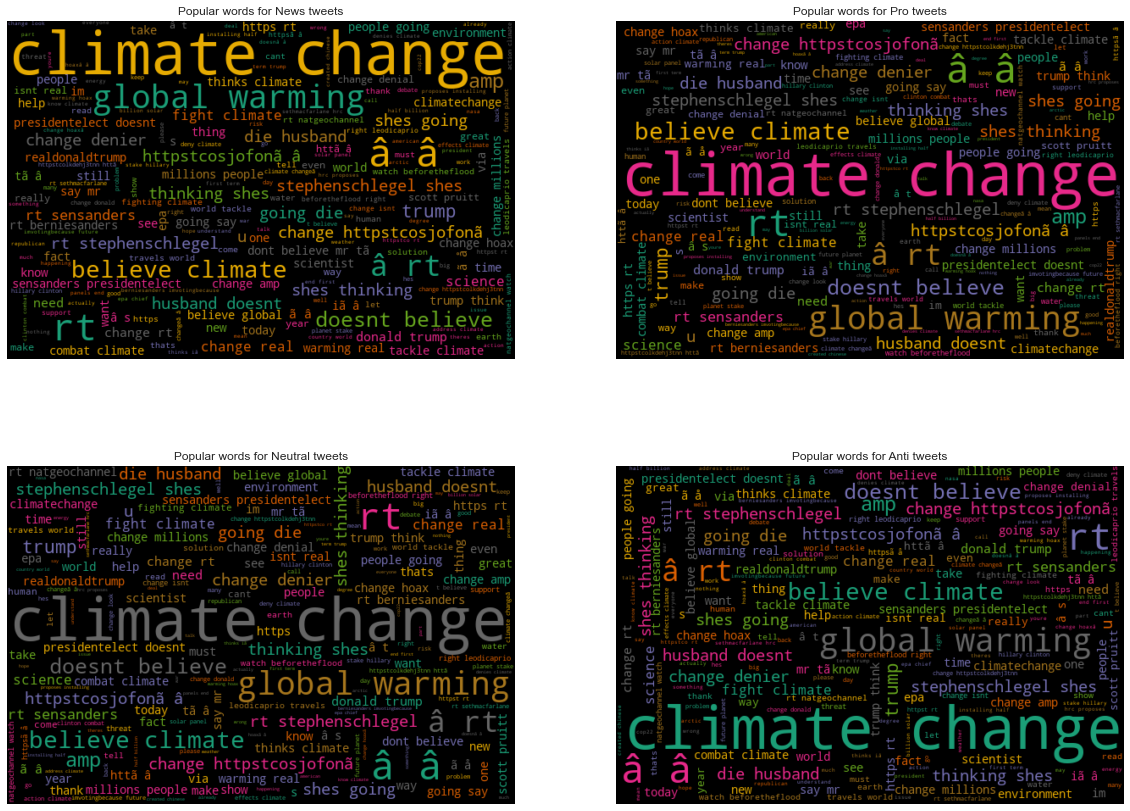

In [20]:
wc = WordCloud(width=600, height=400, 
               background_color='black', colormap='Dark2',
               max_font_size=150, random_state=42)

plt.rcParams['figure.figsize'] = [20, 15]

# Create subplots 
for i in range(0, len(tweet_list)):
    wc.generate(tweet_list[1])
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(full_title[i])
    
plt.show()

We created a wordcloud to visualize the most tweeted keywords in each sentiment class. We see that a lot of unimportant words and stopwords are still visible. We also see that the keywords "climate change, global warming and belief" are common in all sentiment classes. 'https' words are frequent in all sentiment classes to show that links are shared in tweets.


### Extracting hashtags

ValueError: min() arg is an empty sequence

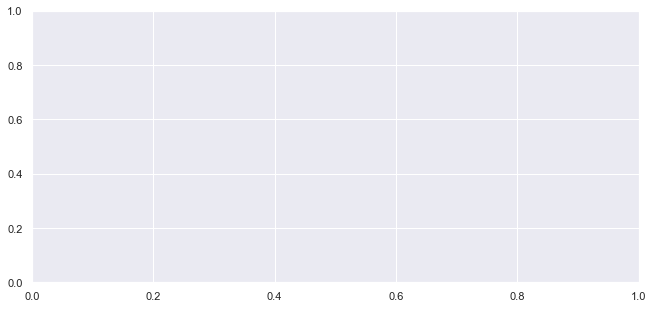

In [24]:
def extract_hashtags(x):
    hashtags = []
    for i in x:
        hash = re.findall(r'#(\w+)', i)
        hashtags.append(hash)
        
    return hashtags

# Extracting hashtags from tweets
news_hashtags = extract_hashtags(tweet_df['message']
                              [tweet_df['sentiment'] == 2])
pro_hashtags = extract_hashtags(tweet_df['message']
                          [tweet_df['sentiment'] == 1])
neutral_hashtags = extract_hashtags(tweet_df['message']
                              [tweet_df['sentiment'] == 0])
anti_hashtags = extract_hashtags(tweet_df['message']
                          [tweet_df['sentiment'] == -1])

# hashtag list
hashtags = [sum(news_hashtags, []), sum(pro_hashtags, []),
            sum(neutral_hashtags, []),sum(anti_hashtags, [])]

# Visualising the Hashtags
ft = [' Hashtags on the News sentiment',
              ' Hashtags on the Pro sentiment',
              ' Hashtags on the Neutral sentiment',
              ' Hashtags on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(hashtags):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Hashtag': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Hashtag', x='Count')
    plt.title(ft[i])
    plt.show()

The most popular hashtags are, broadly, climate and climatechange. This is expected, given the topic of this dataset. Also among the top 4 are related words particularly in the anti sentiment to trump and his campaign slogan maga (Make America Great Again). 'OpChemtrails' is a popular conspiracy theory amoung QAnon circles, supposedly  governments keep their citizenry placated by releasing chemicals into the atmosphere, the supposed proof of this are the condensation trails left across the sky by high-altitude jetliners. #BeforeTheFlood is the title of a 2016 documentary about Climate Change that starred Leonardo DiCaprio. COP22 is an international summit where representatives from countries around the world meet to discuss and devise plans to tackle Climate Change, ParisAgreement was a well-known international agreement signed in Paris that involved a majority of the World's countries pledging to limit Global Warming to 1.5 degrees Celsius above pre-industrial levels.

### Extracting twitter handles

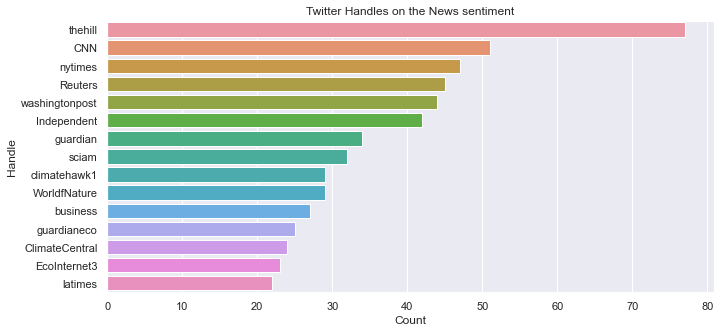

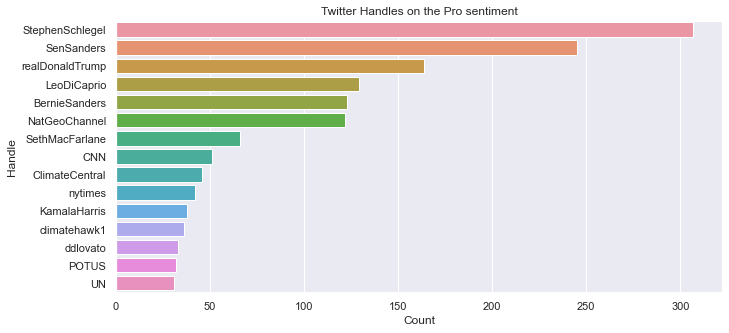

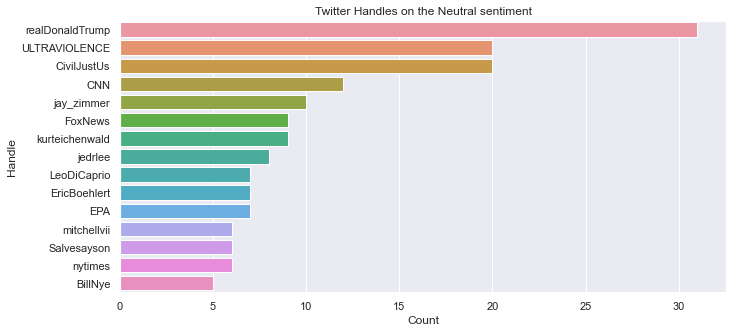

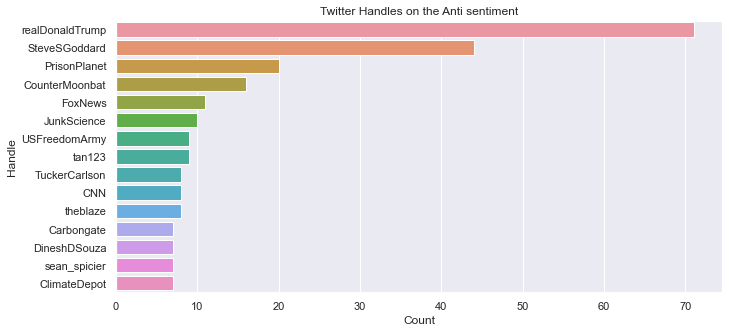

In [90]:
def extract_handles(x):
    handles = []
    for i in x:
        h = re.findall(r'@(\w+)', i)
        handles.append(h)
        
    return handles

news_handles = extract_handles(tweet_df['message']
                              [tweet_df['sentiment'] == 2])
pro_handles = extract_handles(tweet_df['message']
                          [tweet_df['sentiment'] == 1])
neutral_handles = extract_handles(tweet_df['message']
                              [tweet_df['sentiment'] == 0])
anti_handles = extract_handles(tweet_df['message']
                          [tweet_df['sentiment'] == -1])

# handle lists 
handles = [sum(news_handles, []), sum(pro_handles, []), sum(neutral_handles, []),
           sum(anti_handles, [])]

# Visualising the Handles
full_title = ['Twitter Handles on the News sentiment',
              'Twitter Handles on the Pro sentiment',
              'Twitter Handles on the Neutral sentiment',
              'Twitter Handles on the Anti sentiment']

plt.rcParams['figure.figsize'] = [50, 5]

for i, sent in enumerate(handles):
    plt.subplot(1, 4, i + 1)
    freq_dist = nltk.FreqDist(sent)
    df = pd.DataFrame({'Handle': list(freq_dist.keys()),
                      'Count' : list(freq_dist.values())})

    df = df.nlargest(columns='Count', n=15)

    ax = sns.barplot(data=df, y='Handle', x='Count')
    plt.title(full_title[i])
    plt.show()

The most popular handles are that of media networks, journalists and politicians. This is expected considering the topic of the dataset. News articles are often what trigger discussions online about climate change. Some of the handles unique to the anti sentiment are FoxNews, TuckerCarlson and DineshDSouza. Fox News is a popular right-wing cable news network in the US, Tucker Carlson is a news anchor at Fox News and DineshDSouza is an american right-wing 'commentator'. In the Neutral sentiment, ULTRAVIOLENCE likely referes to Lana Del Rey's popular album of the same name that came out shortly before this dataset was assmbled. 

Now lets see how many tweets contain URLs, and group this by sentiment so we can determine whether tweets of  a specific sentiment contain more URLs than others

In [91]:
def find_url(tweet):
    '''This function uses regex to look for a URL in a tweet, if it finds one it returns the URL
    Otherwise it returns NO URL FOUND'''
    url_pattern = 'https://(t.co|bit.ly)/[a-zA-Z0-9]*' #All twitter links are shortened URLs
    url_results = re.search(url_pattern, tweet, re.IGNORECASE)
    if not url_results is None:
        url = url_results.group()
        return url
    else:
        return "NO URL FOUND"

In [92]:
link_percs = {}

def count_links(tweet):
    '''This function checks if there is a link in the tweet using the function in the cell above'''
    check = find_url(tweet)
    #print(tweet)
    if check == "NO URL FOUND":
        return 0
    else:
        return 1 

by_sentiment = tweets_df.groupby("sentiment") #Group data by sentiment since we are counting hashtags by sentiment
for sentiment, group in by_sentiment: #group contains all the tweets for each sentiment
    counts = group["message"].apply(count_links)
    summed = sum(counts)
    sent_count = len(group)
    link_percs[str(sentiment)] = round(summed/sent_count*100,2)
linkdf= pd.DataFrame.from_dict(link_percs, orient='index')
linkdf.columns = ['percentage']
linkdf.index.name = 'sentiment'
linkdf.index =['Anti', 'Neutral', 'Pro', 'News']
linkdf.index.name = 'sentiment'
linkdf.head()

,percentage
sentiment,
Anti,37.11
Neutral,32.55
Pro,41.91
News,86.51


Text(0.5, 1.0, 'Portion of tweets with a URL in them by sentiment')

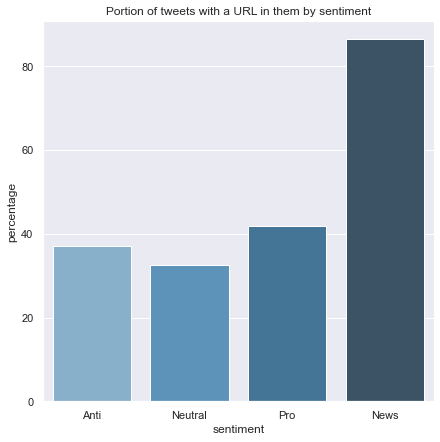

In [93]:
plt.figure(figsize=(7, 7))
sns.barplot(data=linkdf, 
           palette="Blues_d", y='percentage', x=linkdf.index)
plt.title('Portion of tweets with a URL in them by sentiment')

Tweets labeled as 'News' are by far the most likely to contain URLs, this makes sense. Therefore the presence of a URL may be useful for a particular model in determining whether a tweet should be a labeled as News or Anti/Neutral/Pro sentiment. The presence of a URL is likely not as useful for distinguishing between the other sentiments as these tweets all have roughly the same portion of URLs

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
Prior to training a model with any sort of data, it is essential to re-engineer it. This is to ensure that the data is in a consistent form with no missing values, incorrect data types or just plain incorrect data. For structured,  numeric data, this entails scaling values, filling in missing values and typecasting any non-numeric data to numeric form. Non-numeric data, such as this database is often unstructured and consists of text data. This type of data is not easily interpretable by computers. Computers work with 1s and 0s, not letters and words. Therefore it must be converted into a form that is interpretable, and therefore, numeric data. 

In [3]:
df = df_train.copy()

In [4]:
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


### Text Cleaning -  Removing URLs

Many of the tweets in this dataset have URLs in them. For this project, we have decided to completely replace them with a consistent "url-web" token. Another option is to extract useful information from these links. One approach we tried was to extract the title of webpages in tweets and add them to the tweet text, this could potentially improve model quality, but there are several issues with this approach. Firstly, this dataset is a few years old, many of the URLs no longer exist, in addition to this, there appears to be an encoding issue with the some of the tweets which contain strange non-standard characters, when these characters occur in tweet URLs, this breaks it. 

---

Additionally, extracting information from URLs, aka webscraping, is a slow process. This dataset contains a few thousand URLs so to extract page titles from each URL a request needs to be sent, a response must be recieved and HTML data must be downloaded. Doing this a few times is not an issue but doing it a few thousand times takes a significant amount of time and data. It is possible to speed this process up by making it highly threaded, so that each URL isn't queryied sequentially, but this doesn't solve the problem entirely

In [5]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

The next step taken was to convert all capital letters to lowercase

In [6]:
df['message'] = df['message'].str.lower()

### Remove stopwords.. sort of

Removal of stopwords is actually going to be done during vectorization. However the internal sklearn implementation for removing stopwords used by the TfidfVectorizer is supposedly problematic so instead we'll be using a list NTLK's english stopwords during vectorization by passing it to the our TfidfVectorizer object later. The slight problem with this approach is that our next step involves removing all punctuation, so a stop word like "won't" will not be removed because it will be converted to "wont", and the ntlk list of english stop words doesn't contain most contractions without apostrophes.

In [7]:
ntlk_stopwords = stopwords.words('english')
for i in range(len(ntlk_stopwords)):
    ntlk_stopwords[i] = ntlk_stopwords[i].replace("'", "")
print(ntlk_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'shes', 'her', 'hers', 'herself', 'it', 'its', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'thatll', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', '

### Remove all non-standard characters and punctuation. 

---
What remains in each tweet is now only lowercase letters, numbers and spaces.

In [8]:
normal_chars = 'abcdefghijklmnopqrstuvwxyz0123456789 '
def remove_weird_chars(post):
    return ''.join([l for l in post if l in normal_chars])

In [9]:
df['message'] = df['message'].apply(remove_weird_chars)

In [10]:
df.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

### Comet Code to Create an experiment
---
This code links this notebook to a comet project and workspace, and then tells comet we are starting an experiment. While this code was all used during this project, it was not all used at the same time, in one notebook as models were initially trained accross multiple notebooks (one notebook, one model, one comet experiment). In the cell below and the throughout this notebook, comet experiment parameters and metrics are present for all 3 models in this notebook, but this has over-complicated things in this notebook as we assumed metrics and parameters for multiple models should not normally be be uploaded to comet as part of the same experiment.

In [50]:
# Create an experiment with your api key
experiment = Experiment(
    api_key="gha5BVtd13oq6JKBX99b4MZAx",
    project_name="classification-predict",
    workspace="classification-team-1",
)

# Report multiple hyperparameters using dictionaries:
vect_params = {
    "vectorizer": "TfidfVectorizer",
    "min_df": 2,
    "max_df": 0.25,
    "analyzer": "char",
    "ngram_range": '6,6'}
experiment.log_parameters(vect_params)

model_type = 'Compelent Naive Bayes'
model_type = 'Support Vector Classifier'
model_type = 'Multinomial Logistic Regression'

experiment.log_parameters(model_type)

hyper_params_mlr = {
    "C": 1
}
hyper_params_cnb = {
    "alpha": 0.5
}
hyper_params_svc = {
    "C": 1.5
}

experiment.log_parameters(hyper_params_cnb)
experiment.log_parameters(hyper_params_svc)
experiment.log_parameters(hyper_params_mlr)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/classification-team-1/classification-predict/6cc4d9e95b994783919724a8ee85c134



## Creating Features and labels datasets

In [51]:
X = df["message"]
y = df["sentiment"]

In [52]:
X.head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: message, dtype: object

## Train, test split

---
When training a model, it is essential to set some data aside that will not be exposed to the model during the initial training process. This data is used after training to evaluate the trained model's performance. If this is not done, we have no way of knowing how our model will perform on unseen data. Will it be able to generalize well? Or has it just learnt to minimize errors on the training data (ie our model is overfitted). Below we split our features and labels into training and testing sets, with the testing set being 25% of the total data set and the training set being the other 75%.

In [53]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Vectorizing using Tfidf

---
The overall process of turning a collection of text data into numerical vectors is called vectorization. This process is often divided into 3 steps:

1.Tokenize text by assigning an ID to each possible token, often by using whitespace as a token separator.

2.Count the number of times each token occurs in the document.

3.Normalizing and reducing the weighting of tokens that occur very often in the corpus as these likely do not assist in model training.

After vectorization, a corpus of strings or documents can be stored as a matrix, where a row corresponds to a document and a column corresponds to a particular token. This strategy outlined above is known as a 'Bag of Words' representation as text data is stored purely as counts of word occurances, with word order not generally being a factor. Generally is the important word here because during vectorization in this notebook we are not tokenizing every word but rather stretches of characters (excluding whitespace) 6 characters in length (ngrams). Curiously, we found tokenizing based on character length and ngrams specifically of length 6 resulted in the best performing models when all hyperparameters were kept constant. Initial intuition would suggest that words would be the best way to tokenize and the vectorize text, but thats an assumption based on our understanding of language which does not necessarily apply to computers.

---

tf–idf, the vectorization method here stands for term-frequency times inverse document-frequency, and it was used because it helps minimize the importance of tokens that appear frequently in the corpus. Also, that is an enormous matrix produced, fortunately it is a sparse matrix and not an ndarray (for the sake of the PC this notebook is open on). Protip: be *very* wary of converting a sparse matrix into an ndarray.

In [54]:
vect = TfidfVectorizer(min_df=2, max_df=0.25, analyzer='char', ngram_range=(6,6), stop_words=ntlk_stopwords)
vect.fit_transform(X_train)

<11864x91470 sparse matrix of type '<class 'numpy.float64'>'
	with 944852 stored elements in Compressed Sparse Row format>

In [55]:
pred_dict = {}

## Model 1: Complement Naive Bayes classifier

---
Naive Bayes Classifiers make use of Bayes Theorem to make predictions. Bayes theorem states that the probability of an event can be determined based on knowledge of the conditions that lead to that event. Bayes classifiers are considered 'Naive' because they assume that the features for every class are completely independant of each other. For the purposes of modelling . Naive Bayes classifiers are useful because they are relatively simple and therefore computationally easy to train on large datasets, for this reason it is the quickest model to train in this notebook. The model trained here is a variant of the MultinomialBayes Classifier known as the Complement Naive Bayes Classifier. Multinomial Bayes Classifiers are often used for text classification problems, with the Complement variant being especially suitable to inbalanced datasets.

In [56]:
param_grid_cnb = {'alpha': [0.01, 0.05, 0.1,0.25,0.5,0.75,1]}

In [57]:
grid_CNB = GridSearchCV(ComplementNB(), param_grid_cnb, scoring='f1_weighted')

In [58]:
grid_CNB.fit(vect.transform(X_train), y_train)
grid_CNB.best_params_

{'alpha': 0.5}

In [59]:
cnb = ComplementNB(alpha=0.5)

In [60]:
cnb.fit(vect.transform(X_train), y_train)
y_pred = cnb.predict(vect.transform(X_test))
pred_dict['CNB'] = y_pred

In [61]:
cnb_report = metrics.classification_report(y_test, y_pred,digits=3)

In [62]:
cnb_report_dict = metrics.classification_report(y_test, y_pred,digits=3, output_dict=True)

Comet code below to submit the classification report for the Complement Naive Bayes Classifier

In [63]:
experiment.log_metrics(cnb_report_dict['-1'], prefix='-1', step=None, epoch=None)
experiment.log_metrics(cnb_report_dict['0'], prefix='0', step=None, epoch=None)
experiment.log_metrics(cnb_report_dict['1'], prefix='1', step=None, epoch=None)
experiment.log_metrics(cnb_report_dict['2'], prefix='2', step=None, epoch=None)
experiment.log_metrics(cnb_report_dict['macro avg'], prefix='macro avg', step=None, epoch=None)
experiment.log_metrics(cnb_report_dict['weighted avg'], prefix='weighted avg', step=None, epoch=None)

## Model 2: Linear Support Vector Classifier

---
Support Vector Classifiers work by identifying boundaries between groups of datapoints, the boundaries identified are known as decision boundaries, similar to those used by logistical regression models. However unlike logistical regression models SVCs use a differnt algorithm to identify boundaries, known as a kernel trick.

In [58]:
param_grid_lsvc = {'C': [0.1,0.25,0.5,0.75,1,1.25,1.5,1.75,2]}

In [59]:
grid_SVC = GridSearchCV(LinearSVC(), param_grid_lsvc, scoring='f1_weighted')

In [60]:
grid_SVC.fit(vect.transform(X_train), y_train)
grid_SVC.best_params_

{'C': 1.5}

In [64]:
svc = LinearSVC(C=1.5)

In [65]:
svc.fit(vect.transform(X_train), y_train)
y_pred = svc.predict(vect.transform(X_test))
pred_dict['LSVC'] = y_pred

In [71]:
svc_report = metrics.classification_report(y_test, y_pred,digits=3)

In [72]:
svc_report_dict = metrics.classification_report(y_test, y_pred,digits=3, output_dict=True)

Comet code below to submit the classification report for the Support Vector Classifier

In [73]:
experiment.log_metrics(svc_report_dict['-1'], prefix='-1', step=None, epoch=None)
experiment.log_metrics(svc_report_dict['0'], prefix='0', step=None, epoch=None)
experiment.log_metrics(svc_report_dict['1'], prefix='1', step=None, epoch=None)
experiment.log_metrics(svc_report_dict['2'], prefix='2', step=None, epoch=None)
experiment.log_metrics(svc_report_dict['macro avg'], prefix='macro avg', step=None, epoch=None)
experiment.log_metrics(svc_report_dict['weighted avg'], prefix='weighted avg', step=None, epoch=None)

## Model 3: Multinomial Logistical Regression

---
Logistic regression relies on the same principles of a linear regression but it makes use of a common S-shaped curve known as the logistic function. This curve is commonly known as a sigmoid, and in logisitc regression, it can be used to predict categorical data since it assumes 2 distinct values, instead of a range of values which is what would be useful in a standard regression function.

---
A grid search algorithm was not used to determine the optimum value of the 'C' parameter here (the inverse regularization strength) as values other than 1 (the default) result in drastically longer training times. 

In [69]:
mlr = LogisticRegression(C=1, max_iter=10000)

Multinomial logistic regression is computationally expensive, this cell below takes a few seconds to run..

In [70]:
mlr.fit(vect.transform(X_train), y_train)
y_pred = mlr.predict(vect.transform(X_test))
pred_dict['MLR'] = y_pred

In [75]:
mlr_report = metrics.classification_report(y_test, y_pred,digits=3)

In [74]:
mlr_report_dict = metrics.classification_report(y_test, y_pred,digits=3, output_dict=True)

In [76]:
experiment.log_metrics(mlr_report_dict['-1'], prefix='-1', step=None, epoch=None)
experiment.log_metrics(mlr_report_dict['0'], prefix='0', step=None, epoch=None)
experiment.log_metrics(mlr_report_dict['1'], prefix='1', step=None, epoch=None)
experiment.log_metrics(mlr_report_dict['2'], prefix='2', step=None, epoch=None)
experiment.log_metrics(mlr_report_dict['macro avg'], prefix='macro avg', step=None, epoch=None)
experiment.log_metrics(mlr_report_dict['weighted avg'], prefix='weighted avg', step=None, epoch=None)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    

---

### Classification Reports for all models

---
What is immediately clear from these reports is all models struggled to classify tweets belonging to the -1 and 0 ('anti' and 'neutral') sentiment classes. This is due to the data imbalance mentioned earlier --there is simply not enough data to teach these models how to identify these tweets. However certain models performed worse than others with regards to these challenging classes. Focusing on F1-scores, the Logistic Regression model performed especially poorly when it comes to the -1  and 0 classes ('anti' and 'neutral'), significantly worse than the other models, this is probably because Logistic regression models are known to struggle with very imbalanced data. The Complement Naive Bayes and Support Vector Classifiers both performed substantially better when identifying these classes, with the SVC achieving the highest F1 scores for both classes. For the 1 and 2 classes ('Pro' and 'News'),  the MLR model performed relatively well, actually beating the CNB classifier, however again, the SVC model achieved the highest overal F1 scores for both classes.

In [77]:
print('Complement Naive Bayes classifier:')
print(cnb_report)
print('Support Vector Classifier:')
print(svc_report)
print('Multinomial Logistical Regression:')
print(mlr_report)

Complement Naive Bayes classifier:
              precision    recall  f1-score   support

          -1      0.754     0.464     0.575       336
           0      0.629     0.360     0.458       547
           1      0.782     0.841     0.810      2178
           2      0.683     0.836     0.752       894

    accuracy                          0.741      3955
   macro avg      0.712     0.625     0.649      3955
weighted avg      0.736     0.741     0.728      3955

Support Vector Classifier:
              precision    recall  f1-score   support

          -1      0.843     0.256     0.393       336
           0      0.658     0.320     0.431       547
           1      0.727     0.930     0.816      2178
           2      0.807     0.723     0.763       894

    accuracy                          0.742      3955
   macro avg      0.759     0.557     0.601      3955
weighted avg      0.745     0.742     0.715      3955

Multinomial Logistical Regression:
              precision    recall

### Confusion Matricies

---
Shown below are the confusion matricies for the three models we fitted to the vectorized training data. Cell labels have all been normalized, so the values represent percentages of the total of each class. What is immediately clear is that all 3 models struggle to overcome the class inbalance in the dataset. The logistic regression model is by far the worst in this regard, as it is very biased towards the Pro (1) sentiment class when presented with tweets belonging to the Anti and Neutral (-1,0) sentiment classes. Since the majority of tweets in the dataset belong to the News and Pro classes (1,2), the model naturally performs much better when presented with tweets of these classes. The other two models exhibit similar behaviour, but are able to correctly identify tweets in the anti class almost twice as often as the logistic regression model. Like the Logistic Regression model, both models also struggle to correctly identify neutral tweets, although the Support Vector Classifier in particular does perform slightly better in this regard.

---

The primary conclusion that can be drawn from these confusion matricies is just how detrimental imbalanced data is to model quality. Since the dataset was not particularly large to begin with, a few hundred tweets belonging to the anti and neutral classes is simply not enough data for the models to train on. Since there were a few thousand tweets belonging to the Pro and News classes, all three models were much better at identifying tweets belonging to these classes.

In [78]:
cm_cnb = confusion_matrix(y_test, pred_dict['CNB'])
cm_svc = confusion_matrix(y_test, pred_dict['LSVC'])
cm_mlr = confusion_matrix(y_test, pred_dict['MLR'])
labels = ['-1: Anti', '0: Neutral', '1: Pro', '2: News']

In [79]:
experiment.log_confusion_matrix(matrix=cm_cnb, labels=labels, title='Confusion Matrix of CNB, counts')
experiment.log_confusion_matrix(matrix=cm_svc, labels=labels, title='Confusion Matrix of SVC, counts')
experiment.log_confusion_matrix(matrix=cm_mlr, labels=labels, title='Confusion Matrix of MLR, counts')

{'web': 'https://www.comet.ml/api/asset/download?assetId=344d364d3ba540b2be4bdc9c7e070858&experimentKey=6cc4d9e95b994783919724a8ee85c134',
 'api': 'https://www.comet.ml/api/rest/v2/experiment/asset/get-asset?assetId=344d364d3ba540b2be4bdc9c7e070858&experimentKey=6cc4d9e95b994783919724a8ee85c134',
 'assetId': '344d364d3ba540b2be4bdc9c7e070858'}

In [80]:
cm_cnb = cm_cnb/cm_cnb.sum(axis=1).reshape(-1, 1)
cm_svc = cm_svc/cm_svc.sum(axis=1).reshape(-1, 1)
cm_mlr = cm_mlr/cm_mlr.sum(axis=1).reshape(-1, 1)

Text(0.5, 33.22222222222222, 'Predicted labels')

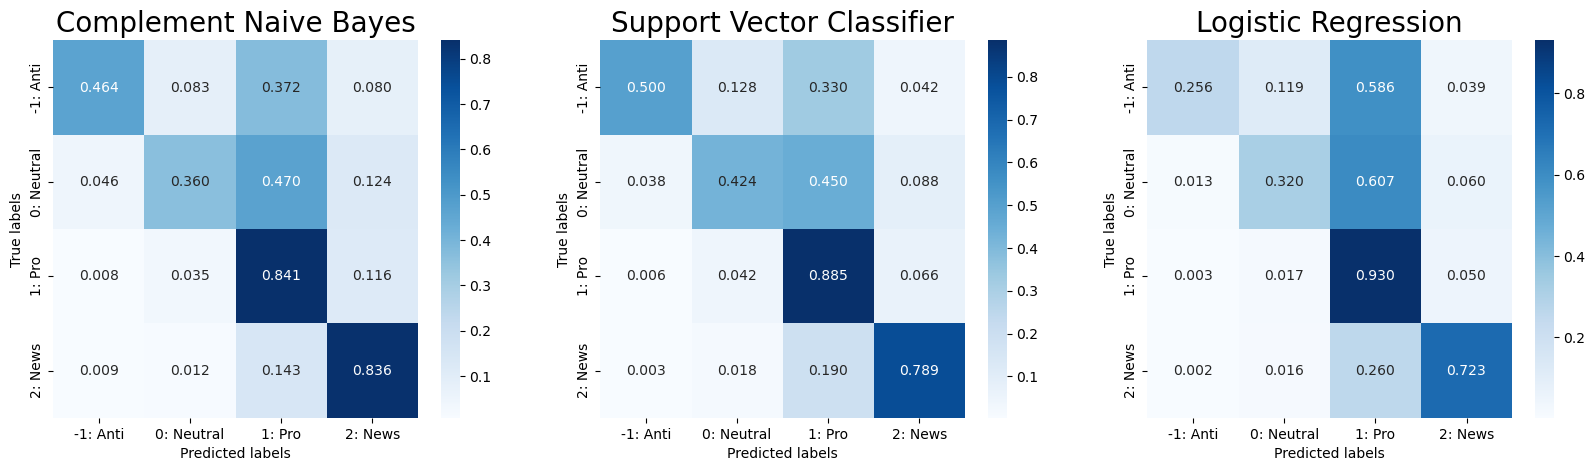

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5),sharex=True, dpi=100)
sns.heatmap(cm_cnb, annot=True, cmap='Blues', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=axes[0])
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=axes[1])
sns.heatmap(cm_mlr, annot=True, cmap='Blues', fmt='.3f', xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[0].set_title(f"Complement Naive Bayes", fontsize=20)
axes[0].set_ylabel("True labels")
axes[0].set_xlabel("Predicted labels")
axes[1].set_title(f"Support Vector Classifier", fontsize=20)
axes[1].set_ylabel("True labels")
axes[1].set_xlabel("Predicted labels")
axes[2].set_title(f"Logistic Regression", fontsize=20)
axes[2].set_ylabel("True labels")
axes[2].set_xlabel("Predicted labels")

Code to tell Comet that you have concluded the experiment and that all metrics and data has been uploaded. If you don't do this in a Jupyter Notebook your experiment data is left drifting in the cloud all alone for eternity :(

In [82]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/classification-team-1/classification-predict/6cc4d9e95b994783919724a8ee85c134
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     -1_f1-score [4]            : (0.39269406392694056, 0.6199261992619925)
COMET INFO:     -1_precision [4]           : (0.7536231884057971, 0.8431372549019608)
COMET INFO:     -1_recall [4]              : (0.25595238095238093, 0.5)
COMET INFO:     -1_support                 : 336
COMET INFO:     0_f1-score [4]             : (0.43050430504305043, 0.49892473118279573)
COMET INFO:     0_precision [4]            : (0.6057441253263708, 0.6578947368421053)
COMET INFO:     0_recall [4]               : (0.31992687385740404, 0.42413162705667273)
COMET INFO:     0_support                  : 547
COMET INFO:     1_f1-score [4]  

<a id="seven"></a>
## 7. Model Explanation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
What should be apparent by now is that in terms of overall performance, taking into account recall, precision and most importantly F1-score across all sentiment classes, the linear support vector Classifier we have trained is the best model. 

Conceptually, Support Vector Classifiers are relatively straightforward. They all construct one or more spaces with n dimensions and then plot data you supply onto these spaces. For every every n-dimentional space, the classifier tries to split the data points into two groups (classes) using a hyperplane. A hyperplane is a subspace that us one dimension less than the space it exists in (think of a an infinitely thin string lying across an infinitely thin piece of paper, the paper exists in 2 dimensions while the string exists in 1). One of the reasons for the use of hyperplanes, is that a set of data may not be feasibly separable in a, for example, 3-dimensional space, and so this 3-dimensional space is mapped to 3+p-dimensional space based on the (often correct) assumption that separation in this 3+p-dimensional space is more feasible.

How are datapoints separated? A Support Vector Classifier will construct what is known as a decision boundary (a hyperplane) such that points on one side are assigned to label X and points on the other side are assigned to label Y. When generating this hyperplane the goal is to maximise the distance between the nearest datapoints and the hyperplane The datapoints which determine where the separating hyperplane is are called support vectors.

<a id="eight"></a>
## 8. Appendix
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
This section is just for the code we initially used to do some webscraping, which we decided not to implement for reasons mentioned above. We did not think it was essential for our minimum viable product. However in the future it would be really cool to add it back and implement it in the Streamlit app, perhaps due to the time implication it could be option: when submitting tweet, either choose whether you want to scrape web URLs or not, if you do, then be warned that this will increase the time required for predictions to complete. The BeautifulSoup library does make webscraping a lot easier

---
Also, threading workloads in Python is a nightmare. Why is it that every tutorial I looked at requires like 34535 lines of boilerplate code before you get to the actual workload code thats 10 lines? 
ANYWAY, I found a this amazing blogpost that I cannot find anymore which explained how to use a threadpool object and a map function to create a simple multithreaded bit of code. 

In [ ]:
import requests
from bs4 import BeautifulSoup
from multiprocessing.dummy import Pool as ThreadPool

In [ ]:
def find_url(tweet):
    url_pattern = 'https://(t.co|bit.ly)/[a-zA-Z0-9]*' #All twitter links are shortened URLs
    url_results = re.search(url_pattern, tweet, re.IGNORECASE)
    if not url_results is None:
        url = url_results.group()
        return url
    else:
        return "NO URL FOUND"

In [ ]:
def get_webpage_title2(url):
    print(url)
    global count
    count = count + 1
    print(count)
    if url == 'NO URL FOUND':
        return "NO URL"
    elif ' ' in url or len(url) == 0:
        return 'URL ERROR'
    pattern = "<title.*?>.*?</title.*?>"
    url_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    page = None
    try:
        page = requests.get(url, allow_redirects=True,timeout=3)
    except requests.exceptions.RequestException:
        return 'URL ERROR'
    soup = BeautifulSoup(page.content, "html.parser")
#     results = soup.find(id="title")
    if soup.title is None:
        return 'WEBPAGE ERROR'
    results = soup.title.get_text()
    return results

In [ ]:
df['url'] = df['message'].apply(find_url)

In [ ]:
df.head()

In [ ]:
urls = df['url']
urls.head()

This cell will take a very long time to run (10 min) but usually does respond if you try to stop it

Done in 4 lines!!!

In [ ]:
%%time
#************************************ Are you sure you want to run this?*******************************************
global count
count = 0
pool = ThreadPool(32) #32 threads seems to be enough to saturate am internet connection that maxes out at 20Mbit/s 
results = pool.map(get_webpage_title2, urls)
pool.close()
pool.join()

In [ ]:
results

This list can then be appended to a dataframe or each title can be added to the actual tweet text.